# This file demonstrates Segment Anything Model through Meta
---
- Tested on Raw Band Contrast image to demonstrate capabiltities and for documentation concerning the model


# Install torch if not already. Do not run if already installed!


In [ ]:
!pip install torch torchvision

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3099, in _parsed_pkg_info
    return self._pkg_info
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info. Did you mean: 'egg_info'?

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/

https://youtu.be/fVeW9a6wItM

https://github.com/facebookresearch/segment-anything

@author: Digitalsreeni (Sreenivas Bhattiprolu)

First make sure pytorch and torchcvision are installed, for GPU
In my case: pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

pip install opencv-python matplotlib
pip install 'git+https://github.com/facebookresearch/segment-anything.git'

OR download the repo locally and install
and:  pip install -e .

Download the default trained model:
    https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

Other models are available:
    https://github.com/facebookresearch/segment-anything#model-checkpoints


# Install SAM

In [ ]:
!pip install opencv-python matplotlib
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-j6c9ep6t
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-j6c9ep6t
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36587 sha256=c973736b1f8c39c5e419f3bd350feb2f07e00295683940b47e15b0be072e6031
  Stored in directory: /tmp/pip-ephem-wheel-cache-67_fqxy5/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment-anything


# Download pretrained model

In [ ]:
import requests
import os

# URL of the pretrained model
url = 'https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth'

# Local path to save the downloaded model
file_path = 'sam_vit_h_4b8939.pth'

# Download the file from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Open the file in write-binary mode and save the content
    with open(file_path, 'wb') as file:
        file.write(response.content)
    print(f"Model downloaded successfully and saved as {file_path}")
else:
    print("Failed to download the model")

Model downloaded successfully and saved as sam_vit_h_4b8939.pth


# Import more dependencies


In [ ]:
# Tested on python 3.9.16
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())


import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

PyTorch version: 2.1.0+cu118
Torchvision version: 0.16.0+cu118
CUDA is available: True


# Display testing image
- Currently just finding file in ```/content``` so upload directly
- Note: /content files are deleted with runtime



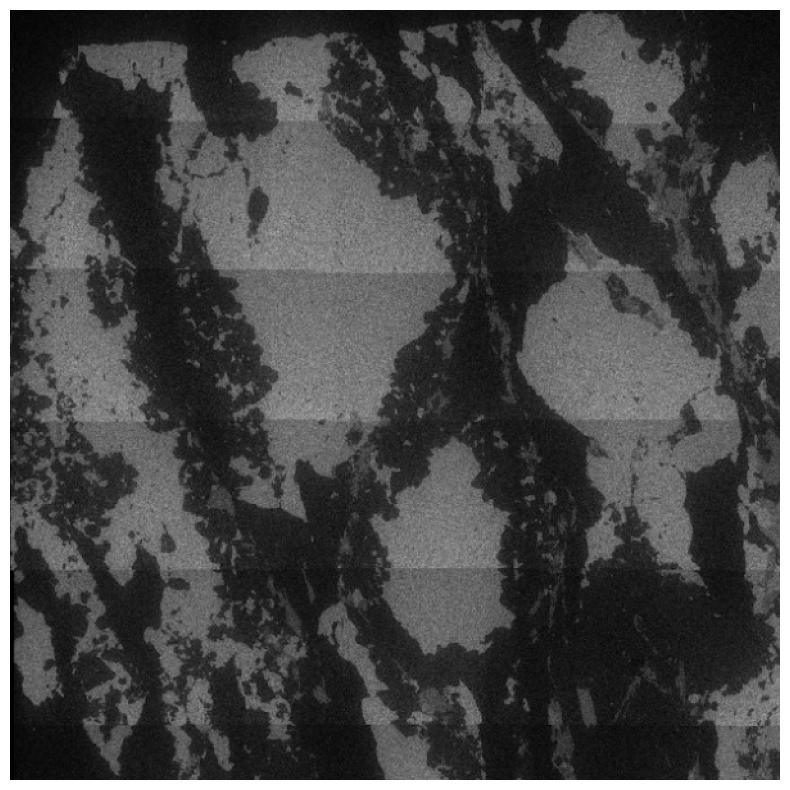

In [ ]:
image = cv2.imread('/content/Cropped_K.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

# Define parameters for creating mask through Segment Anything Model

In [ ]:
sam_checkpoint = "/content/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)


#There are several tunable parameters in automatic mask generation that control
# how densely points are sampled and what the thresholds are for removing low
# quality or duplicate masks. Additionally, generation can be automatically
# run on crops of the image to get improved performance on smaller objects,
# and post-processing can remove stray pixels and holes.
# Here is an example configuration that samples more masks:


#Rerun the following with a few settings, ex. 0.86 & 0.9 for iou_thresh
# and 0.92 and 0.96 for score_thresh

'''
Notes:
Here are the description of the parameters
#https://github.com/facebookresearch/segment-anything/blob/9e1eb9fdbc4bca4cd0d948b8ae7fe505d9f4ebc7/segment_anything/automatic_mask_generator.py#L35
'''
mask_generator_ = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,
    pred_iou_thresh=0.85,
    stability_score_thresh=0.87,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=100,  # Requires open-cv to run post-processing
)

masks = mask_generator_.generate(image)

print(len(masks))

151


# Show annotations made on BC cropped image

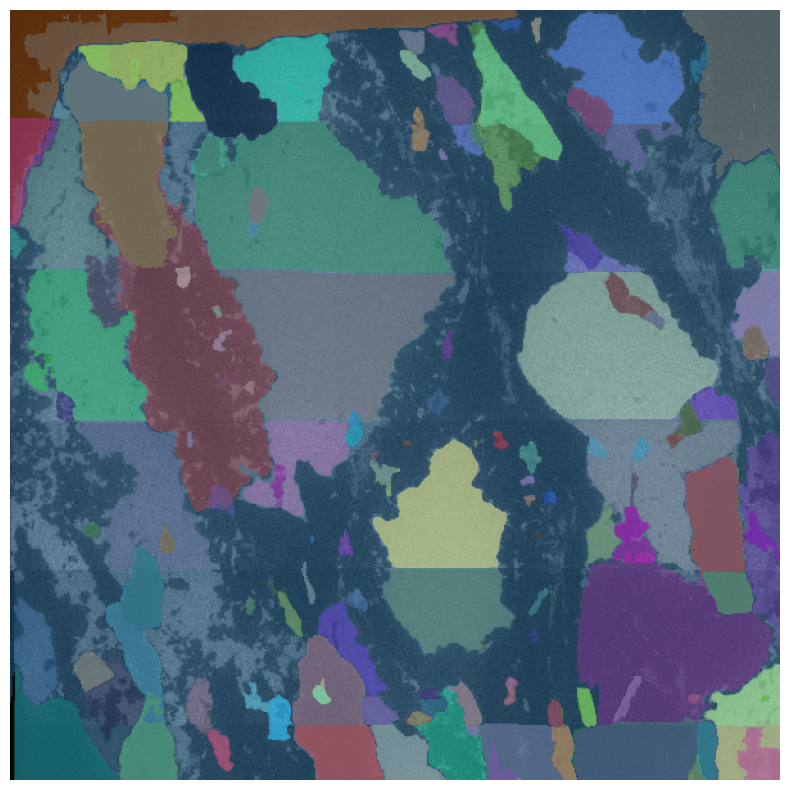

"\nMask generation returns a list over masks, where each mask is a dictionary containing various data about the mask. These keys are:\n\nsegmentation : the mask\narea : the area of the mask in pixels\nbbox : the boundary box of the mask in XYWH format\npredicted_iou : the model's own prediction for the quality of the mask\npoint_coords : the sampled input point that generated this mask\nstability_score : an additional measure of mask quality\ncrop_box : the crop of the image used to generate this mask in XYWH format\n\n"

In [ ]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))


plt.figure(figsize=(10,10))
plt.imshow(image)
show_anns(masks)



plt.axis('off')
plt.show()

"""
Mask generation returns a list over masks, where each mask is a dictionary containing various data about the mask. These keys are:

segmentation : the mask
area : the area of the mask in pixels
bbox : the boundary box of the mask in XYWH format
predicted_iou : the model's own prediction for the quality of the mask
point_coords : the sampled input point that generated this mask
stability_score : an additional measure of mask quality
crop_box : the crop of the image used to generate this mask in XYWH format

"""

# Show annotations made on BC full image

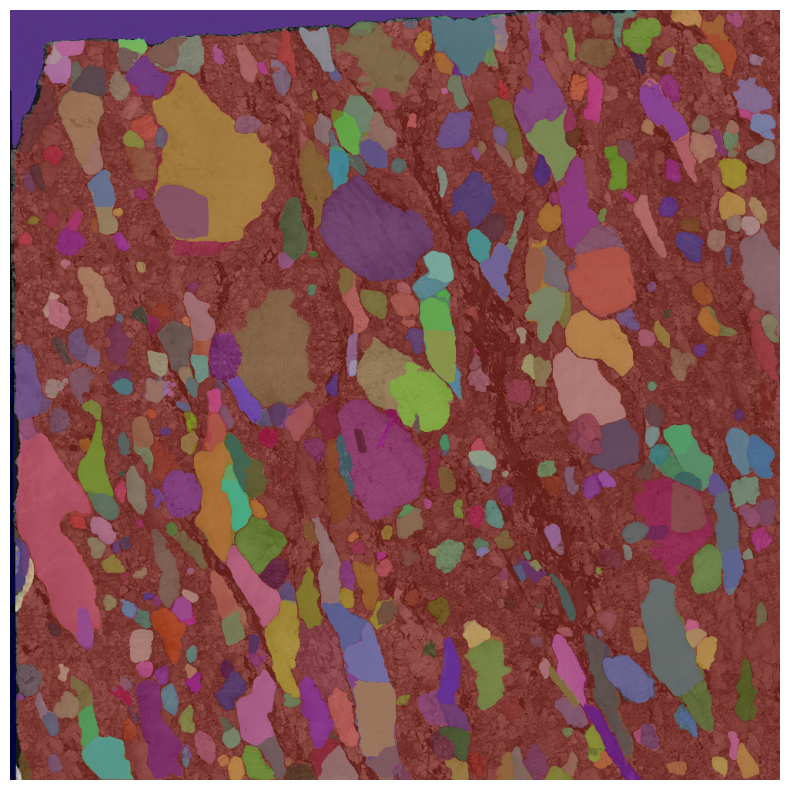

"\nMask generation returns a list over masks, where each mask is a dictionary containing various data about the mask. These keys are:\n\nsegmentation : the mask\narea : the area of the mask in pixels\nbbox : the boundary box of the mask in XYWH format\npredicted_iou : the model's own prediction for the quality of the mask\npoint_coords : the sampled input point that generated this mask\nstability_score : an additional measure of mask quality\ncrop_box : the crop of the image used to generate this mask in XYWH format\n\n"

In [ ]:
def show_anns2(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))


plt.figure(figsize=(10,10))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

"""
Mask generation returns a list over masks, where each mask is a dictionary containing various data about the mask. These keys are:

segmentation : the mask
area : the area of the mask in pixels
bbox : the boundary box of the mask in XYWH format
predicted_iou : the model's own prediction for the quality of the mask
point_coords : the sampled input point that generated this mask
stability_score : an additional measure of mask quality
crop_box : the crop of the image used to generate this mask in XYWH format

"""

# Overlay the image to test results

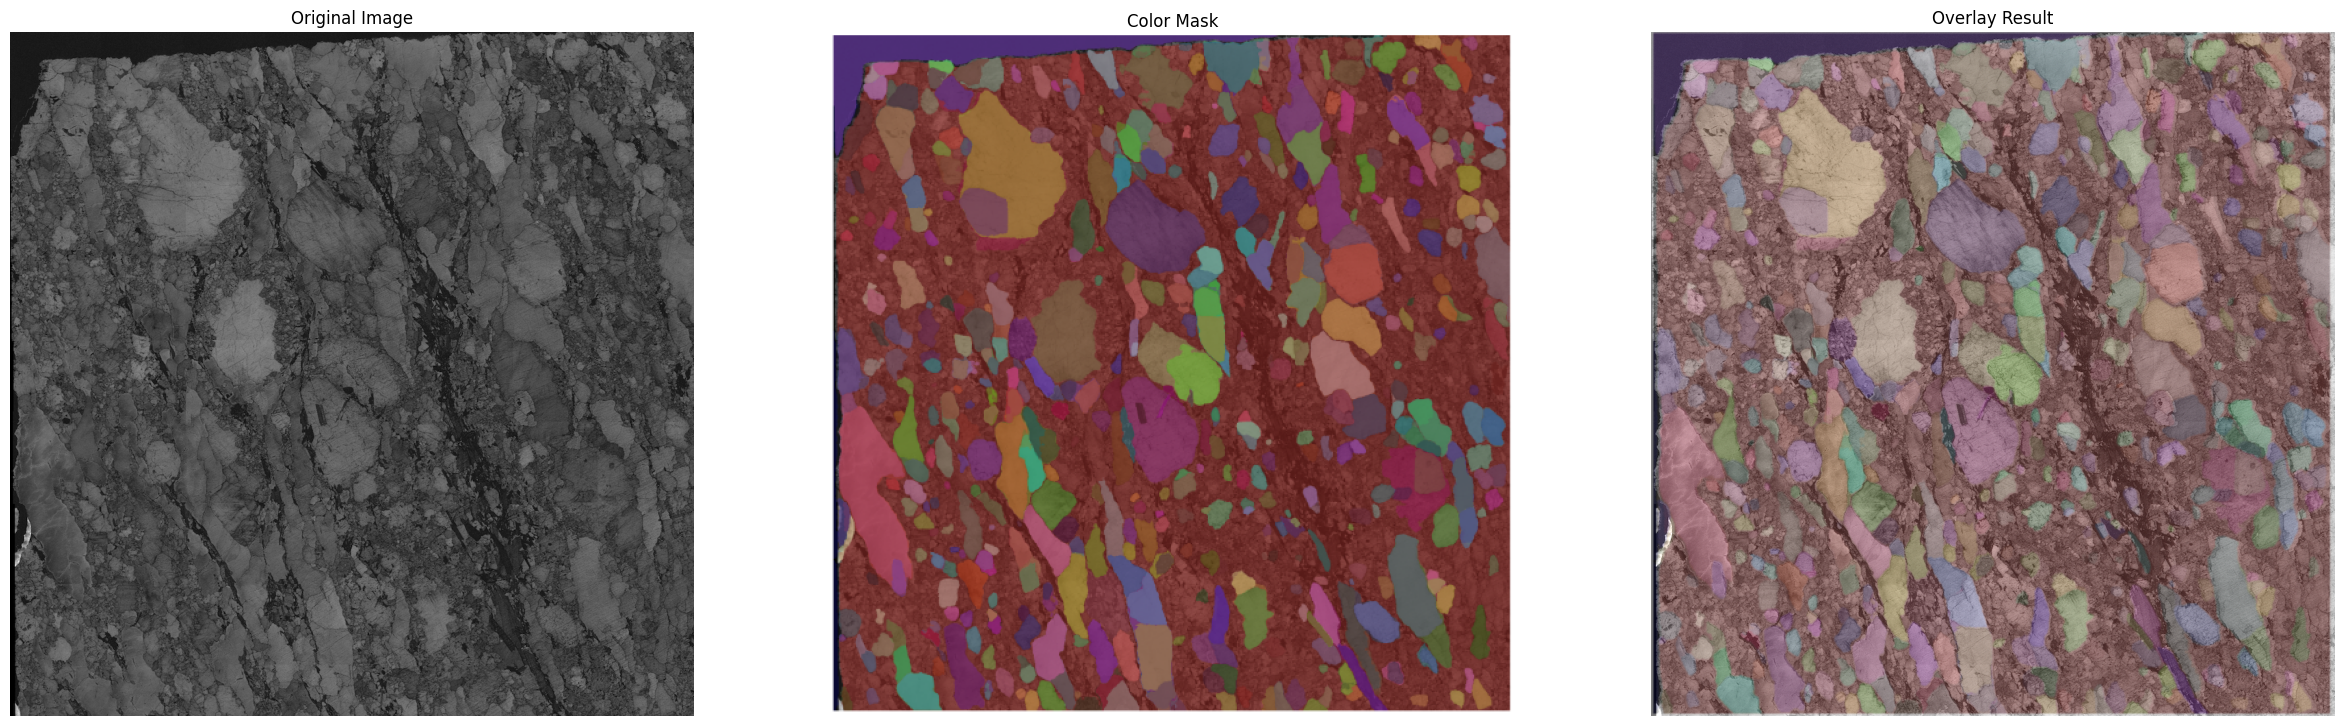

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Function to overlay a color mask on an image
def overlay_mask(image, color_mask):
    # Resize original image to match the mask size
    image_resized = cv2.resize(image, (color_mask.shape[1], color_mask.shape[0]))

    # Overlay the color mask on the resized original image
    overlaid_image = cv2.addWeighted(image_resized, 1, color_mask, 0.5, 0)

    return overlaid_image

# Path to the images (replace with actual paths in a real scenario)
path_to_original_image = '/content/1000x1000_BC.png'
path_to_mask_image = '/content/SAM_1000x1000_BC.png'

# Load the images
original_image = cv2.imread(path_to_original_image)
color_mask = cv2.imread(path_to_mask_image)  # Load the mask in color

# Apply the overlay
overlaid_image = overlay_mask(original_image, color_mask)

# Save the overlayed result to a file
cv2.imwrite('/content/overlayed_result.png', overlaid_image)

# Display the original image, mask, and the result
plt.figure(figsize=(50, 50))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(color_mask, cv2.COLOR_BGR2RGB))
plt.title("Color Mask")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(overlaid_image, cv2.COLOR_BGR2RGB))
plt.title("Overlay Result")
plt.axis('off')

plt.show()
